# 数据分布总结

## 基础核心分布
1. **正态分布（高斯分布）**  
   - **特点**：对称钟形曲线，μ=中位数=众数  
   - **实验案例**：测试两种推荐算法对用户平均停留时长的影响。
   - **操作**：A组（旧算法）和B组（新算法）各5000用户，检验两组停留时长的均值差异（假设数据近似正态）。

2. **伯努利分布**  
   - **特点**：单次二元试验（成功概率p，失败1-p）  
   - **实验案例**：评估按钮颜色（红色vs绿色）对用户点击率（CTR）的影响。
   - **操作**：单个用户曝光按钮后只有点击（p）或不点击（1-p）两种结果。

3. **二项分布**  
   - **特点**：n次独立伯努利试验的成功次数  
   - **实验案例**：对比两个广告创意的转化率（如1000次曝光中转化次数）。
   - **操作**：A创意曝光1000次转化120次，B创意转化150次，检验差异显著性。

4. **泊松分布**  
   - **特点**：单位时间内某一事件发生次数（λ=均值=方差）  
   - **实验案例**：分析新功能上线后用户每日客服投诉次数的变化。
   - **操作**：旧版本日均投诉λ=5次，新版本观测到λ=8次，检验是否显著上升。

## 统计推断分布
5. **t分布**  
   - **特点**：小样本正态估计，尾部厚于正态  
   - **实验案例**：小样本测试付费用户的人均消费差异（A组30人，B组25人）。
   - **操作**：因样本量小，用t检验比较两组消费均值。

6. **卡方分布**  
   - **特点**：独立正态变量平方和  
   - **实验案例**：验证不同性别（男/女）与购买行为（买/不买）是否独立。
   - **操作**：2×2列联表卡方检验，计算χ²统计量。

7. **F分布**  
   - **特点**：两卡方分布变量之比  
   - **实验案例**：比较三个推荐算法组（A/B/C）的停留时长方差是否一致。
   - **操作**：ANOVA分析前需通过F检验验证方差齐性。

---

## 连续型与时间分布
8. **均匀分布**  
   - **特点**：区间内等概率  
   - **实验案例**：验证AB分桶算法的公平性（用户是否被均匀分配到实验组）。
   - **操作**：检查10万用户的分组比例是否为A:B=50%:50%（χ²拟合优度检验）。

9. **指数分布**  
   - **特点**：无记忆性，泊松过程的间隔时间  
   - **实验案例**：测试新页面加载速度对用户跳出率的影响。
   - **操作**：用户停留时间服从指数分布，比较两组λ参数（旧λ=0.1/min vs 新λ=0.15/min）。

10. **对数正态分布**  
    - **特点**：取对数后呈正态  
    - **实验案例**：分析高净值用户的充值金额差异（数据右偏）。
    - **操作**：取对数后比较两组均值（如VIP组vs普通组）。

---

## 互联网长尾分布
11. **幂律分布（帕累托分布）**  
    - **特点**：$$P(X>x) \sim x^{-α}$$  
    - **实验案例**：研究头部用户（Top 10%）在新付费体系下的收益占比变化。
    - **操作**：对比新旧版本中α参数（帕累托指数）是否从2.0降至1.5（长尾更显著）。

12. **贝塔分布**  
    - **特点**：[0,1]区间灵活形状（由α,β参数控制）  
    - **实验案例**：贝叶斯A/B测试广告点击率（CTR）。
    - **操作**：A组先验为Beta(α=50,β=950)，观测到点击50/曝光1000后更新为Beta(100,1950)。

## 其他实用分布
13. **几何分布**  
    - **特点**：首次成功所需的伯努利试验次数  
    - **实验案例**：优化用户首次转化的引导步骤次数。
    - **操作**：旧流程平均需5次曝光才转化（p=0.2），新流程优化后p=0.25，检验几何分布参数差异。


## 总结

| **数据特征**       | **具体分布**          | **核心问题案例**                                | **分析方法**                     | **典型AB实验场景**               |
|--------------------|-----------------------|-----------------------------------------------|---------------------------------|---------------------------------|
| **二元结果**        | 伯努利分布            | 单个用户是否点击按钮？                          | 极大似然估计                    | 按钮颜色对点击概率的原子级验证      |
|                    | 二项分布              | 100次曝光中转化15次的概率？                     | 比例检验（Z-test）              | 广告创意A/B测试转化率对比          |
|                    | 几何分布              | 用户平均需要几次曝光才会首次转化？               | 生存分析（中位数比较）           | 用户引导路径的步骤效率优化          |
| **连续型数据**      | 正态分布              | 用户停留时长均值是否提升？（n>30）              | 独立样本Z检验                   | 推荐算法对停留时间的全局影响        |
|                    | t分布                 | 小样本（n=20）客单价是否有差异？                 | Welch's t检验                   | 新付费策略小规模测试效果验证        |
|                    | 对数正态分布          | 用户充值金额是否呈现右偏分布？                   | 对数变换后t检验                  | 高净值用户付费深度分析             |
| **计数/时间事件**   | 泊松分布              | 新功能导致日均错误次数从5次升至8次？             | 泊松回归（GLM）                 | 系统异常检测与稳定性监控           |
|                    | 指数分布              | 用户两次活跃间隔时间是否缩短？                   | 生存函数拟合（Kaplan-Meier）     | 签到功能改版对留存间隔的影响        |
| **统计检验基础**    | 卡方分布              | 广告渠道与购买行为是否独立？                    | 卡方独立性检验                   | 多渠道投放效果关联性分析            |
|                    | F分布                 | 三个实验组的方差是否齐性？                      | Levene's检验                    | 多版本算法稳定性对比               |
| **随机性验证**      | 均匀分布              | 用户ID哈希分桶是否严格均匀？                    | Kolmogorov-Smirnov检验          | AB实验分流系统公平性审计           |
| **长尾分布**        | 幂律分布（帕累托）    | Top 1%用户贡献收入占比是否超过50%？             | 尾部指数拟合比较                 | 会员体系改版对收入集中度的影响       |
| **贝叶斯推断**      | 贝塔分布              | 如何动态更新CTR的置信区间？                     | 后验概率模拟（MCMC）             | 小流量实验的实时效果贝叶斯评估       |

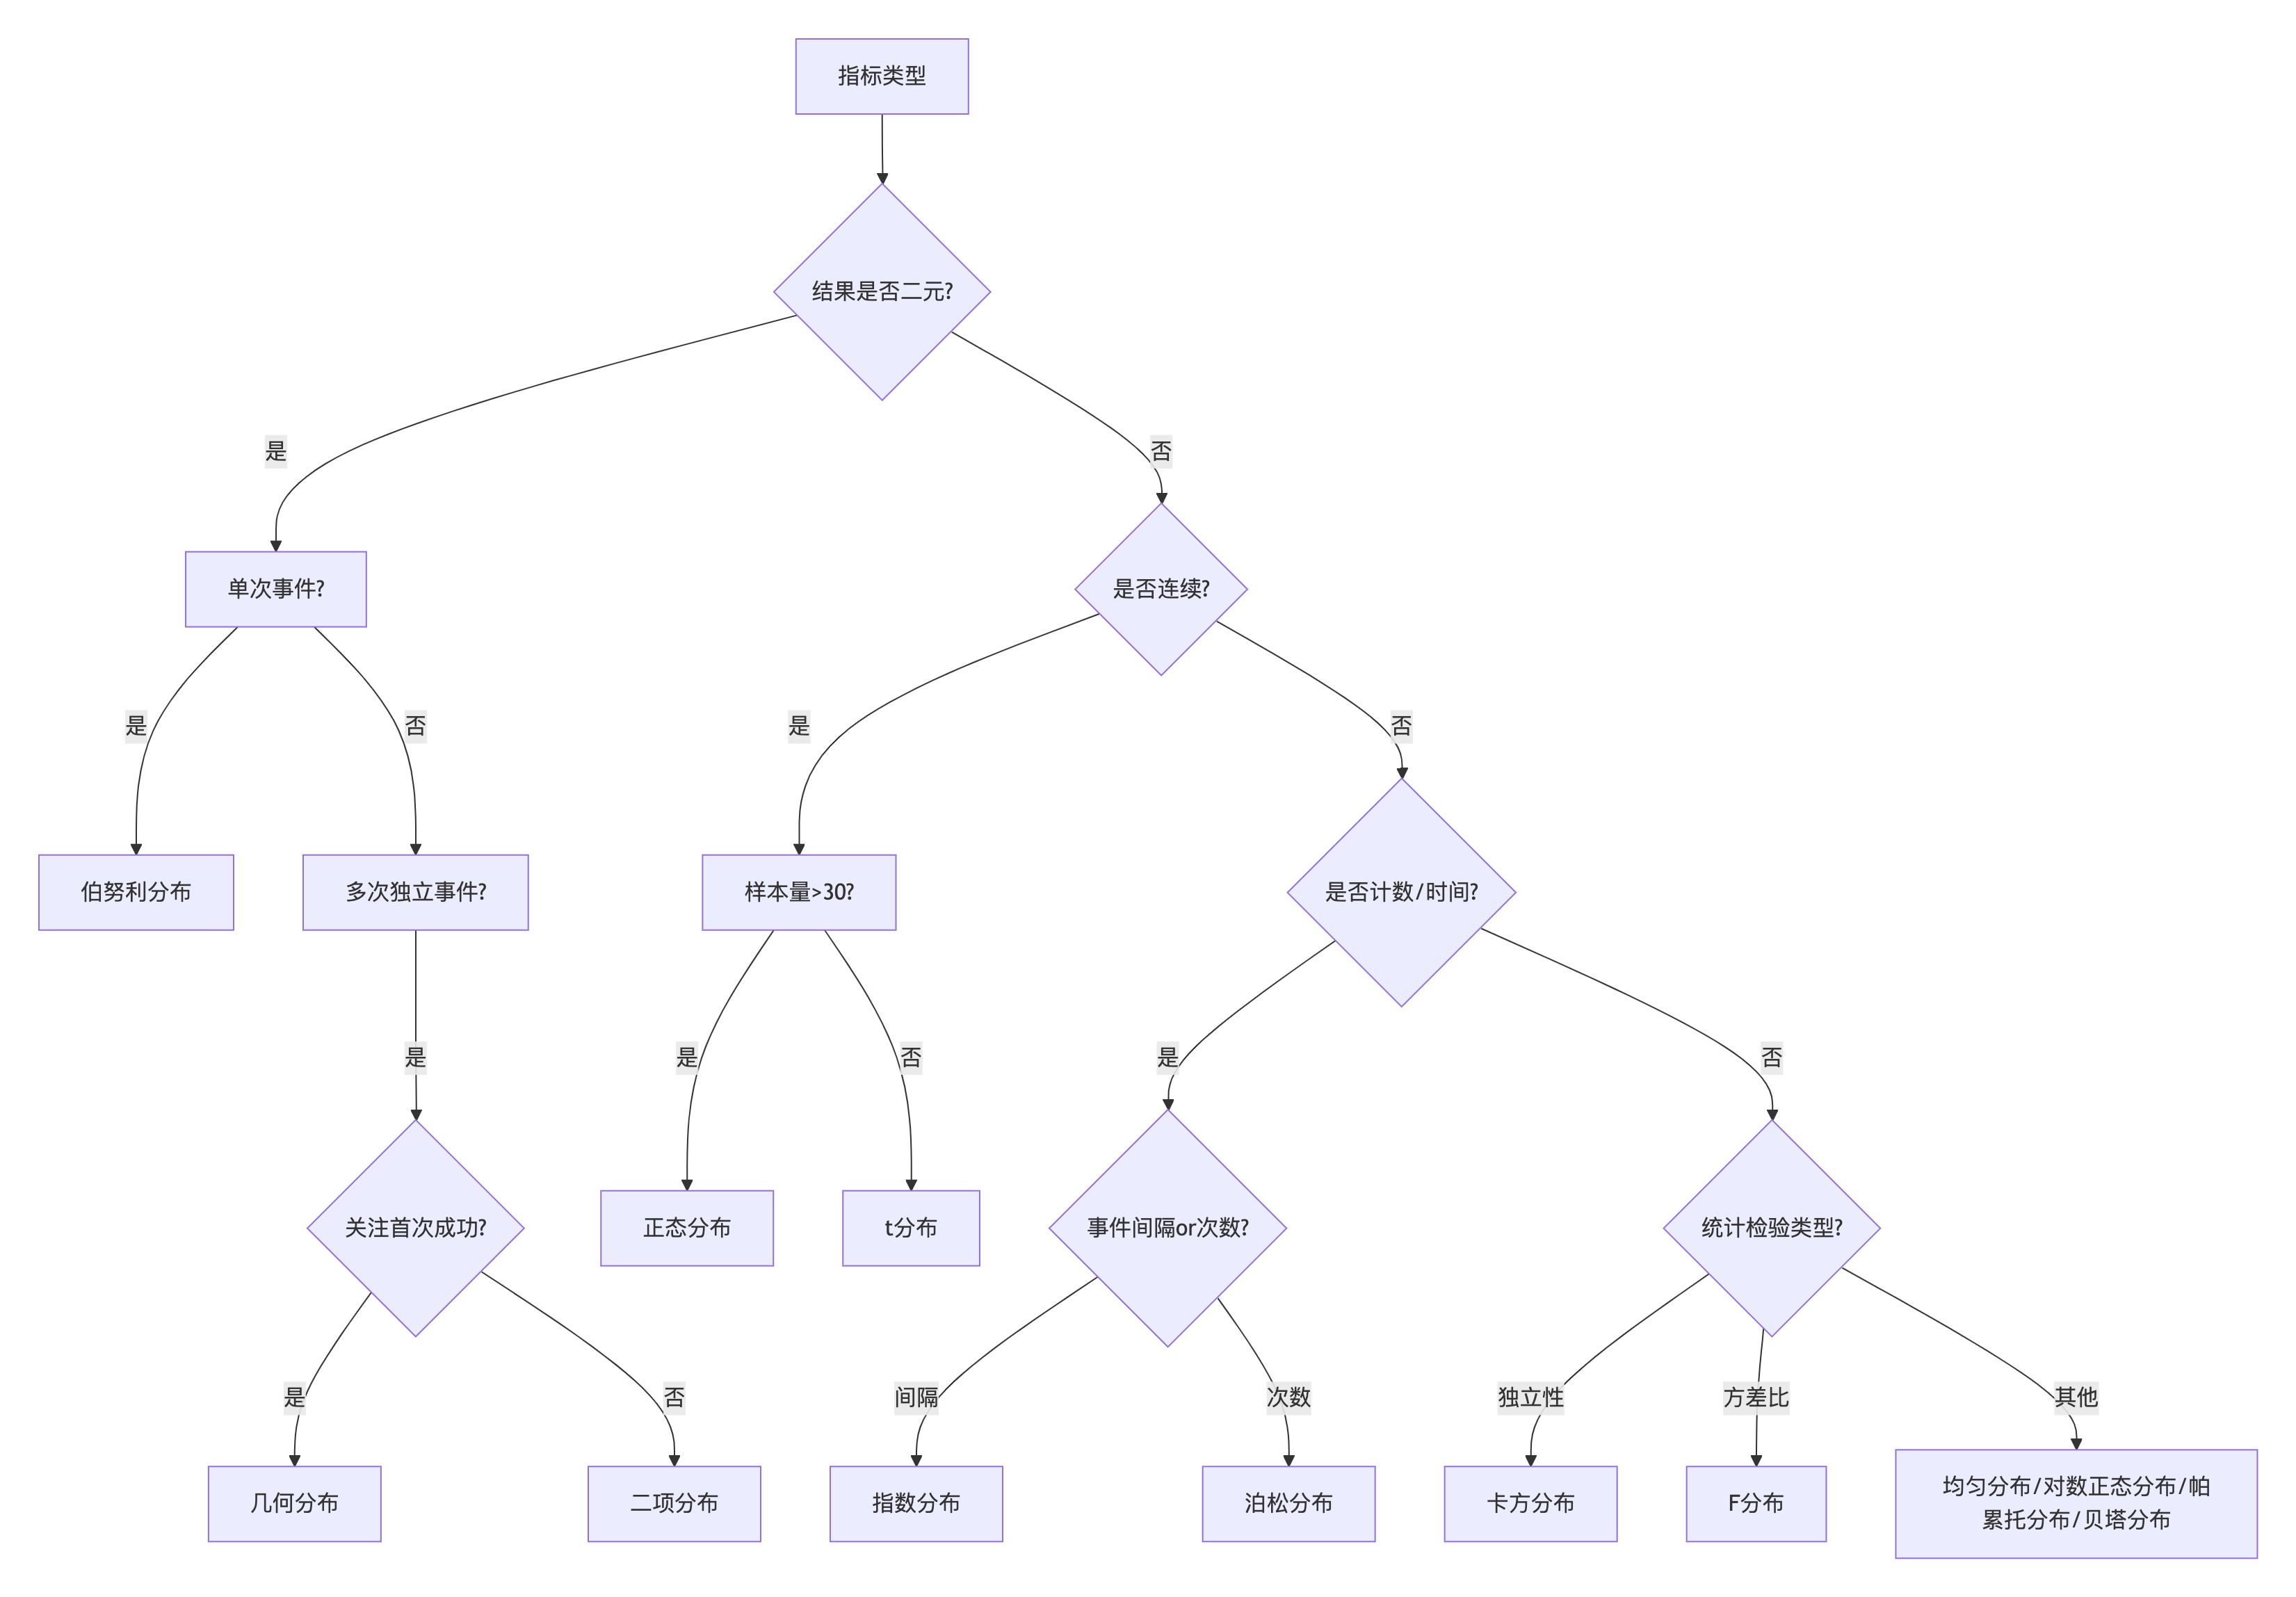

In [2]:
# 示意图
from IPython.display import Image
Image(filename='./pcitures/raw_pics/E14 数据分布——总结与python实现.png', width=1000, height=800)

# python实现

| 名称    | 全称                               | 作用说明                    | 输入参数示例                         | 输出/返回类型  | 备注        |
| ----- | -------------------------------- | ----------------------- | ------------------------------ | -------- | --------- |
| `rvs` | Random Variates Sampling         | 从指定的概率分布中随机采样，生成样本值     | `size=100`, `loc=0`, `scale=1` | 数组（样本值）  | 用于模拟/生成数据 |
| `pdf` | Probability Density Function     | 概率密度函数，返回某点的概率密度值（连续分布） | `x=0`, `loc=0`, `scale=1`      | 浮点数      | 对连续变量使用   |
| `cdf` | Cumulative Distribution Function | 累积分布函数，返回某点的概率（X ≤ x）   | `x=1.5`, `loc=0`, `scale=1`    | 浮点数      | 表示概率区间    |
| `ppf` | Percent-Point Function           | 百分位函数（CDF 的反函数）：给定概率返回值 | `q=0.95`, `loc=0`, `scale=1`   | 数值或数组    | 求分位点、置信区间 |
| `fit` | Fitting                          | 给定数据，拟合最优的分布参数（如均值和标准差） | 数据数组 `data`                    | 元组（参数估计） | 用于参数估计    |

## 正态分布
`scipy.stats.norm.rvs`
   - `loc`: 均值$\mu$
   - `scale`: 标准差$\sigma$
   - `size`: 生成样本数
   - `random_state`: 随机数种子

In [6]:
from scipy.stats import norm
samples = norm.rvs(loc=0, scale=1, size=10000, random_state=0)  # 生成标准正态数据
samples

array([ 1.76405235,  0.40015721,  0.97873798, ...,  0.51687218,
       -0.03292069,  1.29811143])

In [7]:
# .fit()拟合分布参数
norm.fit(samples)

(-0.018433720158265818, 0.9875565681761208)

## t分布
`scipy.stats.t.rvs`
   - `df`: 自由度
   - `loc`: 均值$\mu$
   - `scale`: 标准差$\sigma$
   - `size`: 生成样本数
   - `random_state`: 随机数种子

In [8]:
from scipy.stats import t

# 生成自由度为10的t分布数据
data = t.rvs(df=10, loc=0, scale=1, size=10000, random_state=0)
data

array([ 1.66902321, -1.77333388,  1.01892094, ..., -0.74444839,
        0.50397635, -0.43249498])

In [9]:
# .fit()拟合分布参数
t.fit(data)

(9.442005882396689, -0.0030842635754872215, 0.9855409804924533)

## 伯努利分布
`scipy.stats.bernoulli.rvs`
   - `p`: 成功概率
   - `size`: 生成样本数
   - `random_state`: 随机数种子

In [14]:
from scipy.stats import bernoulli

# 生成p=0.3的伯努利分布
data = bernoulli.rvs(p=0.3, size=10000, random_state=0)
data

array([0, 1, 0, ..., 1, 0, 1])

## 二项分布
`scipy.stats.binom.rvs`
   - `n`: 试验次数
   - `p`: 单次成功概率
   - `size`: 生成样本数
   - `random_state`: 随机数种子

In [15]:
from scipy.stats import binom

# 生成n=10, p=0.5的二项分布
data = binom.rvs(n=10, p=0.5, size=10, random_state=0)
data

array([5, 6, 5, 5, 5, 6, 5, 7, 8, 5])

## 几何分布
`scipy.stats.geom.rvs`
   - `p`: 单次成功概率
   - `size`: 生成样本数
   - `random_state`: 随机数种子

In [17]:
from scipy.stats import geom

# 生成p=0.2的几何分布
data = geom.rvs(p=0.2, size=10, random_state=0)
data

array([ 4,  6,  5,  4,  3,  5,  3, 10, 15,  3])

## 均匀分布
`scipy.stats.uniform.rvs`
   - `loc`: 区间起点$a$
   - `scale`: 区间长度$b-a$
   - `size`: 生成样本数
   - `random_state`: 随机数种子

In [19]:
from scipy.stats import uniform

# 生成[2,5]区间的均匀分布
data = uniform.rvs(loc=2, scale=3, size=10000, random_state=0)
data

array([3.64644051, 4.1455681 , 3.80829013, ..., 4.27528856, 2.07136228,
       4.44072524])

In [20]:
# .fit()拟合分布参数
uniform.fit(data)

(2.0002173489154766, 2.9997165064266915)

## 指数分布
`scipy.stats.expon.rvs`
   - `loc`: 位置参数，表示分布的起点
   - `scale`: 尺度参数，即$1/\lambda$。（$1/\lambda$是速率参数 rate），控制分布的扩展程度
   - `size`: 生成样本数
   - `random_state`: 随机数种子

In [21]:
from scipy.stats import expon

# 生成λ=1.5的指数分布
data = expon.rvs(loc=1, scale=1/1.5, size=10000, random_state=0)
data

array([1.53058301, 1.83728718, 1.6154821 , ..., 1.94706267, 1.01604994,
       2.1198178 ])

In [22]:
# .fit()拟合分布参数
expon.fit(data)

(1.0000483015087294, 0.6604416898675136)

## 泊松分布
`scipy.stats.poisson.rvs`
   - `mu`: 单位时间平均事件次数$\lambda$
   - `size`: 生成样本数
   - `random_state`: 随机数种子

In [23]:
from scipy.stats import poisson

# 生成λ=3的泊松分布
data = poisson.rvs(mu=3, size=10, random_state=0)
data

array([5, 6, 2, 0, 7, 3, 3, 1, 6, 1])

## 卡方分布
`scipy.stats.chi2.rvs`
   - `df`: 自由度
   - `loc`: 位置参数，表示分布的起始点（用于平移分布）
   - `scale`: 尺度参数（用于拉伸/压缩分布）
   - `size`: 生成样本数
   - `random_state`: 随机数种子

In [24]:
from scipy.stats import chi2

# 生成自由度为5的卡方分布
data = chi2.rvs(df=5, loc=1, scale=1, size=10000, random_state=0)
data

array([12.87740141,  6.62133928, 13.48424465, ..., 10.6494331 ,
       13.91811926,  9.48584201])

In [25]:
# .fit()拟合分布参数
chi2.fit(data)

(4.98021358621408, 1.0314795928319738, 0.9898873039337184)

## F分布
`scipy.stats.f.rvs`
   - `dfn`: 分子自由度
   - `dfd`: 分母自由度
   - `loc`: 位置参数，表示分布的起始点（用于平移分布）
   - `scale`: 尺度参数（用于拉伸/压缩分布）
   - `size`: 生成样本数
   - `random_state`: 随机数种子

In [27]:
from scipy.stats import f

# 生成分子自由度为10，分母为20的F分布
data = f.rvs(dfn=10, dfd=20, loc=0, scale=1, size=10000, random_state=0)
data

array([1.75265194, 2.87662798, 0.80856425, ..., 0.70683638, 2.16513103,
       0.92992627])

In [28]:
# .fit()拟合分布参数
f.fit(data)

(10.276304212252459,
 20.377663337203387,
 -0.00436178732388012,
 0.9966522523295166)

## 对数正态分布
`scipy.stats.lognorm.rvs`
   - `s`: 对数标准差$\sigma$
   - `loc`: 位置参数，表示平移（一般设为 0）
   - `scale`: $exp(\mu)$（$\mu$为对数均值）
   - `size`: 生成样本数
   - `random_state`: 随机数种子

In [29]:
import numpy as np
from scipy.stats import lognorm

# 生成μ=0, σ=0.5的对数正态分布
data = lognorm.rvs(s=0.5, loc=0, scale=np.exp(0), size=10000, random_state=0)
data

array([2.41578956, 1.22149877, 1.63128654, ..., 1.29490339, 0.98367438,
       1.91373287])

In [30]:
# .fit()拟合分布参数
lognorm.fit(data)

(0.5037367359675491, 0.01737168167313737, 0.9711594130342946)

## 帕累托分布
`scipy.stats.pareto.rvs`
   - `b`: 形状参数$\alpha$（控制尾部厚度）
   - `loc`: 位置参数，控制分布的起点（默认从 0 开始）
   - `scale`: 尺度参数（控制分布的伸缩，相当于最小可能值$x_m$）
   - `size`: 生成样本数
   - `random_state`: 随机数种子

In [32]:
from scipy.stats import pareto

# 生成α=2.5的帕累托分布
data = pareto.rvs(b=2.5, loc=1, scale=1, size=10000, random_state=0)
data

array([2.37485711, 2.65263718, 2.44670601, ..., 2.76515341, 2.00967648,
       2.95793565])

In [33]:
# .fit()拟合分布参数
pareto.fit(data)

(2.4612608150849584, 1.034450619426752, 0.965578361898436)

## 贝塔分布
`scipy.stats.beta.rvs`
   - `a`: 形状参数$\alpha$
   - `b`: 形状参数$\beta$
   - `loc`: 位置参数，分布的起点，控制平移
   - `scale`: 尺度参数，控制分布的伸缩，默认是1
   - `size`: 生成样本数
   - `random_state`: 随机数种子

In [34]:
from scipy.stats import beta

# 生成α=2, β=5的贝塔分布
data = beta.rvs(a=2, b=5, loc=1, scale=1, size=10000, random_state=0)
data

array([1.47917138, 1.6550558 , 1.21501632, ..., 1.0424796 , 1.4155682 ,
       1.09206707])

In [36]:
# .fit()拟合分布参数
beta.fit(data)

(2.0491572089707653, 4.996224294552176, 1.0004244852793434, 0.9897548613661682)